In [4]:
import sys
import seaborn as sns
import os
import glob
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import avalanches as crfn
import admin_functions as adfn
import plot as pltfn
from kuramoto1 import Kuramoto
from scipy import stats 
import IS as isfn

sns.reset_orig()
#plt.style.use('dark_background')

%load_ext autoreload
%autoreload

# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collectio

In [2]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(F10t + 'Project/' + experiment)
kslist = sorted(glob.glob('*_ks*'))
kslist

[]

## Plot parameter sweep

#### KS distance map 
* deviation from baseline distribution is consistent across parameters

In [58]:
shape = (200)
count=0
ks_sum = np.zeros((shape))
for i in range(shape):
    ks_vec = []
    for t in range(len(np.load(kslist[0]))):
        ks_vec = np.append(ks_vec, np.load(kslist[0])[t][i][0])
        ks_sum[i] = np.sum(ks_vec)/len(ks_vec) 

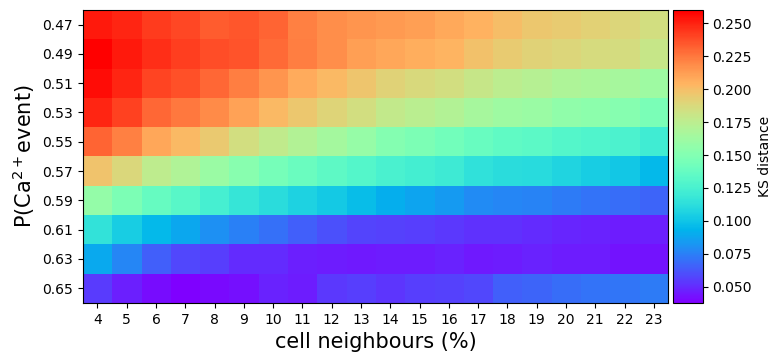

In [59]:
#KS distance
from mpl_toolkits.axes_grid1 import make_axes_locatable
#divnorm = colors.DivergingNorm(vmin=np.min(expsum), vcenter=3.4, vmax=np.max(expsum))
xlist = list(range(21))
for i in range(len(xlist)):
    xlist[i] = str(np.int(np.linspace(3,23, 21)[i]))
    
f, ax = plt.subplots(figsize = (8,5))
nnbs = 20
bcls = np.int(ks_sum.shape[0]/nnbs)
ks_av = ks_sum.reshape((bcls,nnbs))    
plot1 = ax.imshow(ks_av, cmap = 'rainbow')#, norm = divnorm)
ax.set_xlabel('cell neighbours (%)', size = '15')
ax.set_ylabel('P(Ca$^{2+}$event)', size = '15')
ax.locator_params(axis='y', nbins=10)
ax.locator_params(axis='x', nbins=20)
ax.set_xticklabels(xlist, fontsize = 10)
ax.set_yticklabels(adfn.name_zero('back', 0.45, 0.65, 0.02), fontsize = 10)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'KS distance')
plt.show()

In [54]:
shape = (200)
count=0
p_sum = np.zeros((shape))
for i in range(shape):
    p_vec = []
    for t in range(len(np.load(kslist[0]))):
        p_vec = np.append(p_vec, np.load(kslist[0])[t][i][1])
        p_sum[i] = np.sum(p_vec < 0.05)/len(p_vec) 

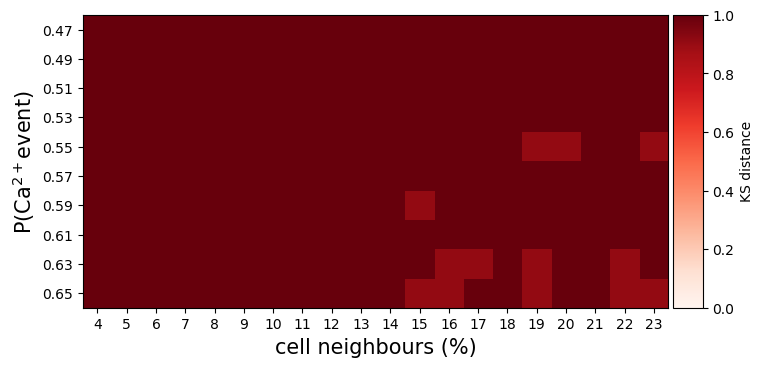

In [57]:
#p value
from mpl_toolkits.axes_grid1 import make_axes_locatable
#divnorm = colors.DivergingNorm(vmin=np.min(expsum), vcenter=3.4, vmax=np.max(expsum))
xlist = list(range(21))
for i in range(len(xlist)):
    xlist[i] = str(np.int(np.linspace(3,23, 21)[i]))
    
f, ax = plt.subplots(figsize = (8,5))
nnbs = 20
bcls = np.int(p_sum.shape[0]/nnbs)
p_av = p_sum.reshape((bcls,nnbs))    
plot1 = ax.imshow(p_av, cmap = 'Reds', vmin = 0, vmax = 1)
ax.set_xlabel('cell neighbours (%)', size = '15')
ax.set_ylabel('P(Ca$^{2+}$event)', size = '15')
ax.locator_params(axis='y', nbins=10)
ax.locator_params(axis='x', nbins=20)
ax.set_xticklabels(xlist, fontsize = 10)
ax.set_yticklabels(adfn.name_zero('back', 0.45, 0.65, 0.02), fontsize = 10)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'KS distance')
plt.show()

#### Exponent change map

#### Branching ratio change map

In [4]:
num = adfn.name_zero('front', 2, 12,1)
shape = (200)
b_sum = np.zeros((11, shape))
count=0
for e in num:
    b_branchlist =  sorted(glob.glob('*E-*' + e + '*BLN*_branch.npy'))
    p_branchlist =  sorted(glob.glob('*E-*' + e + '*PTZ20*_branch.npy'))
    for i in range(len(b_branchlist)):
        b_sum[count,i] = np.load(p_branchlist[i]) - np.load(b_branchlist[i])
    count+=1

b_mean = np.zeros(200)

for i in range(b_sum.shape[1]):
    b_mean[i] = np.sum(b_sum[:,i])/ np.where(b_sum[:,i] >0)[0].shape[0]

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


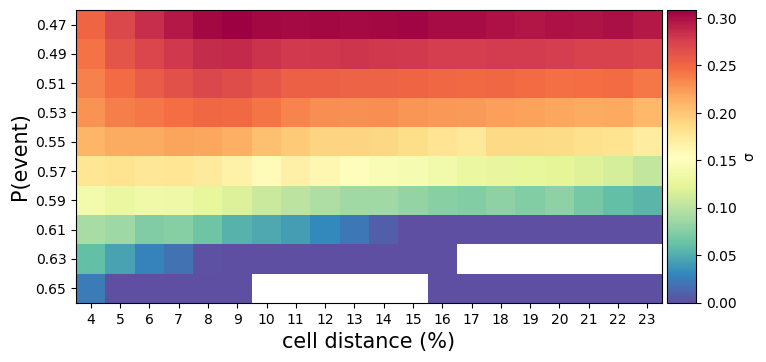

In [7]:
#BRANCHING RATIO CHANGE
xlist = list(range(21))
for i in range(len(xlist)):
    xlist[i] = str(np.int(np.linspace(3,23, 21)[i]))
from mpl_toolkits.axes_grid1 import make_axes_locatable
#divnorm = colors.DivergingNorm(vmin=np.min(mratio), vcenter=150000, vmax=np.max(mratio))
f, ax = plt.subplots(figsize = (8,5))
nnbs = 20
bcls = np.int(b_mean.shape[0]/nnbs)
bmean_mat = b_mean.reshape((bcls,nnbs))    
plot1 = ax.imshow(bmean_mat, cmap = 'Spectral_r', vmin = 0)
ax.set_xlabel('cell distance (%)', size = '15')
ax.set_ylabel('P(event)', size = '15')
ax.locator_params(axis='y', nbins=10)
ax.locator_params(axis='x', nbins=20)
ax.set_xticklabels(xlist, fontsize = 10)
ax.set_yticklabels(adfn.name_zero('back', 0.45, 0.65, 0.02), fontsize = 10)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'σ')
plt.show()

## Baseline - PTZ ccdf
* show for human

In [12]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnlist = sorted(glob.glob('*BLN*_av.npy*'))
p5list = sorted(glob.glob('*PTZ05*_av.npy*'))
p20list = sorted(glob.glob('*PTZ20*_av.npy*'))
p5list

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_PTZ05_run-01_av.npy']

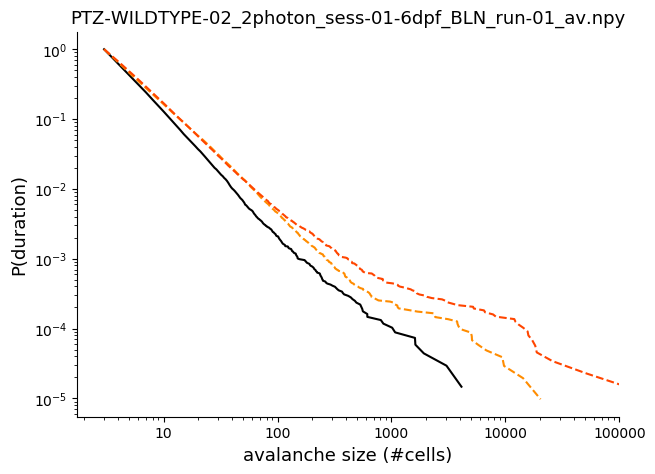

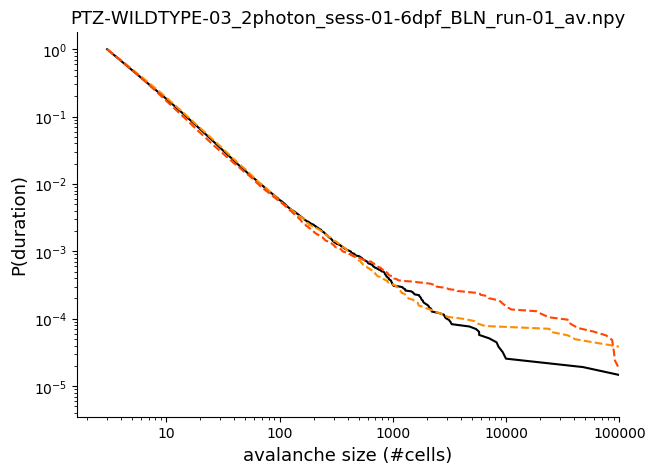

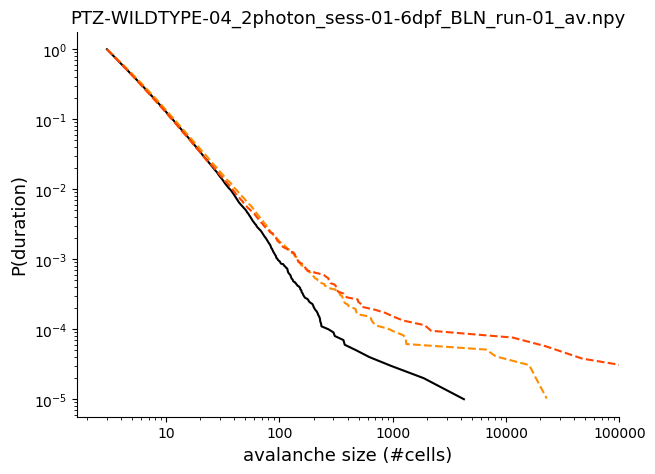

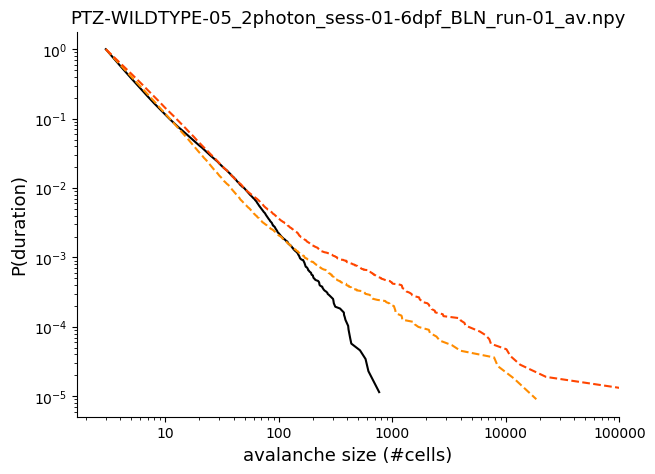

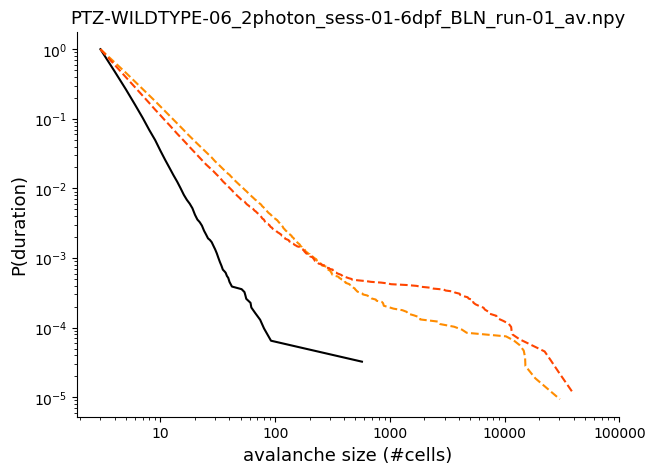

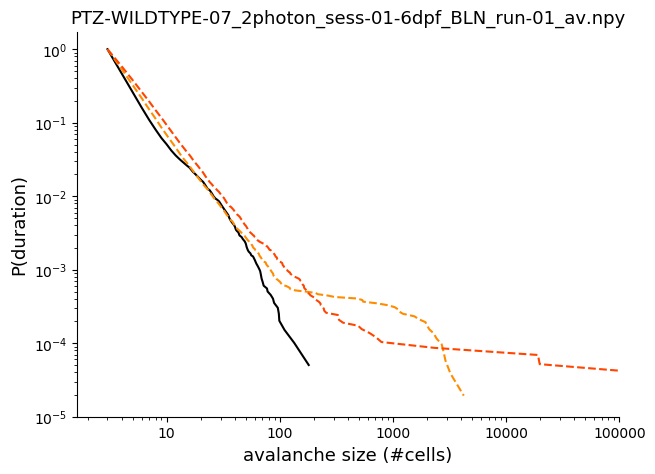

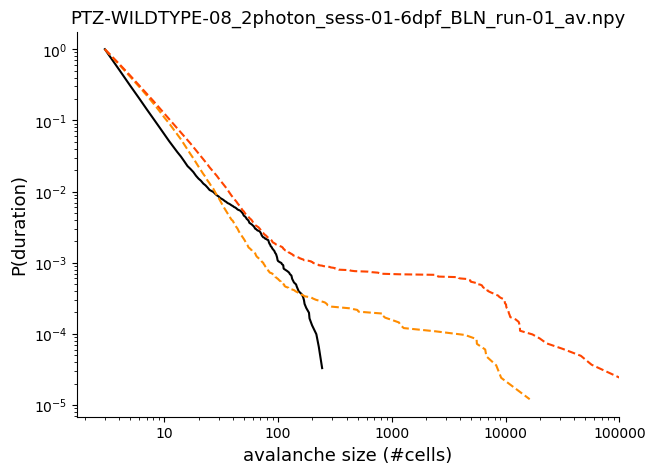

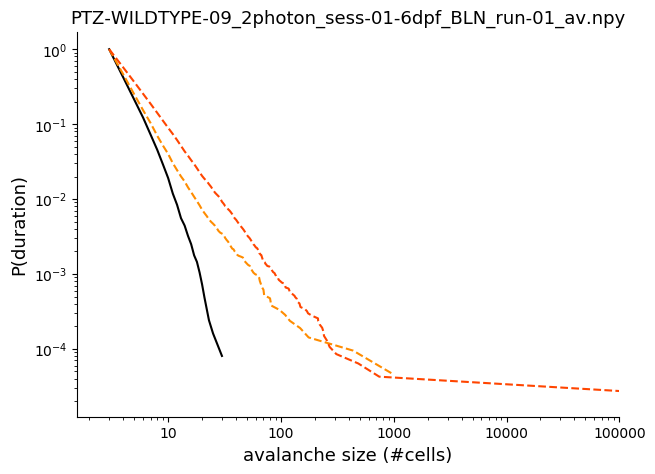

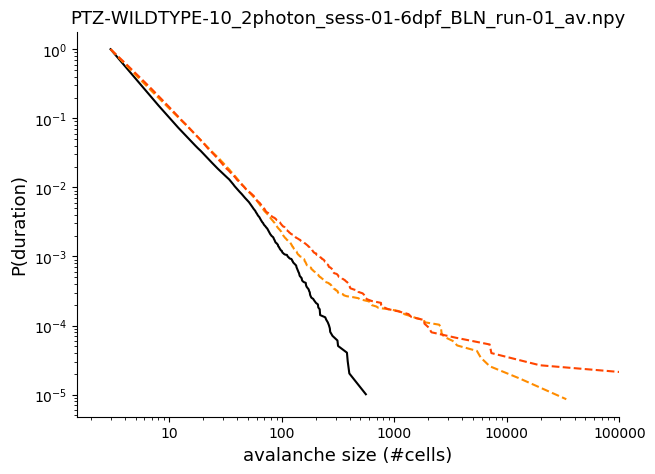

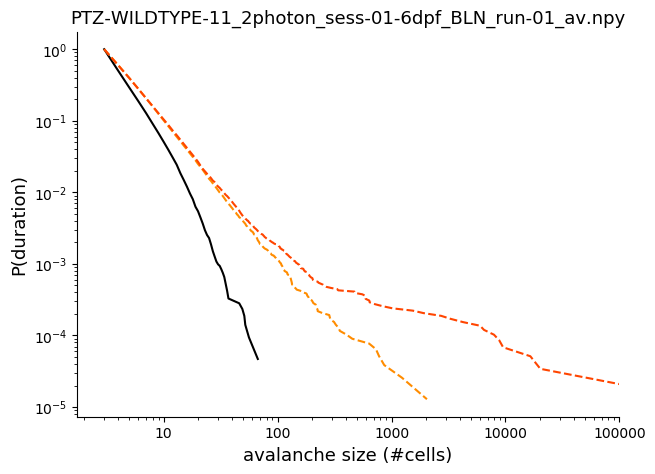

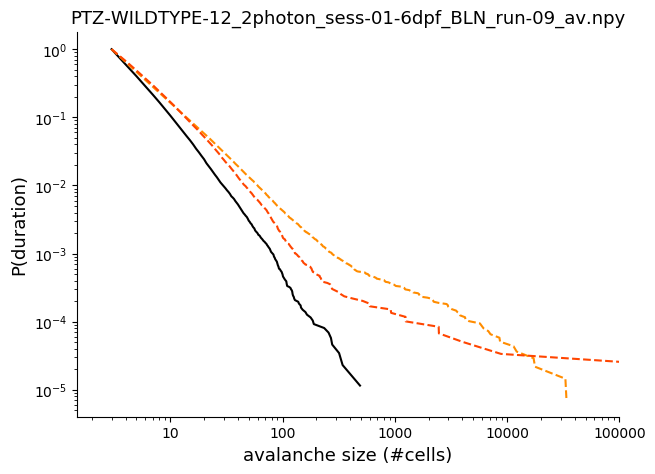

In [4]:
import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
colors = ['black', 'darkorange','orangered']
lines = ['-', '--', '--']
choose=0
for i in num1:
    os.chdir(Fdrop + 'Project/' + experiment)
    blnlist = sorted(glob.glob('*E-' + i + '*BLN*_av.npy*'))
    p5list = sorted(glob.glob('*E-' + i + '*PTZ05*_av.npy*'))
    p20list = sorted(glob.glob('*E-' + i + '*PTZ20*_av.npy*'))
    plotlist = [blnlist,p5list,p20list]
    fig, axarr = plt.subplots(figsize = (7,5))
    for e in range(len(plotlist)):
        avdistcut = np.load(plotlist[e][0])[choose]
        powerlaw.plot_ccdf(avdistcut, linestyle = lines[e],linewidth =1.5 , markersize = 1, alpha = 1, c = colors[e])
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    plt.xlim(right = 100000)  
    #plt.ylim(bottom = 0.000005)  
    axarr.set_title(str(blnlist[0]), size = '13')
    axarr.set_ylabel('P(duration)', size = '13')
    axarr.set_xlabel('avalanche size (#cells)', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.show()

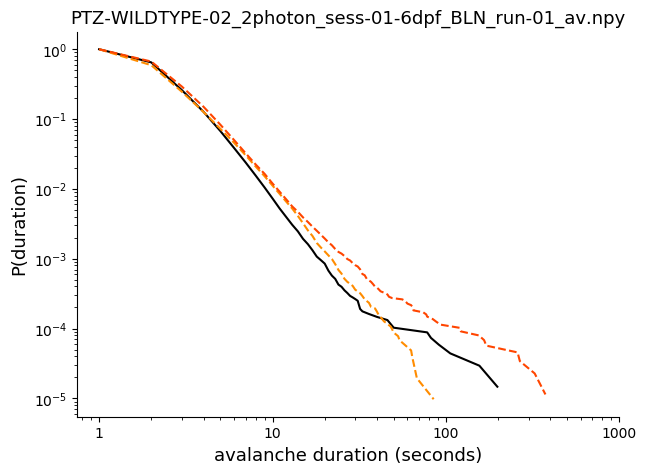

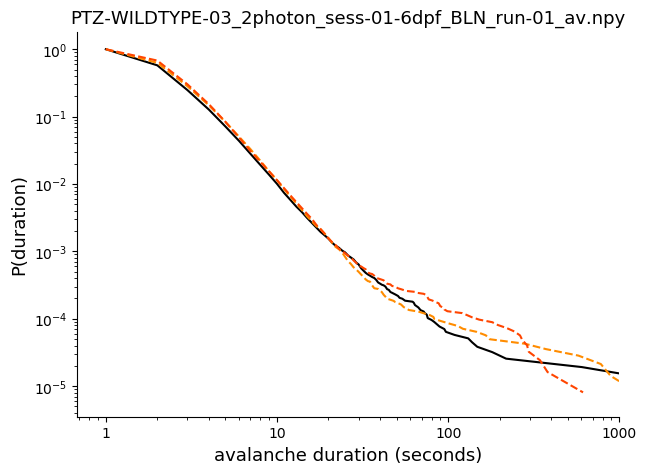

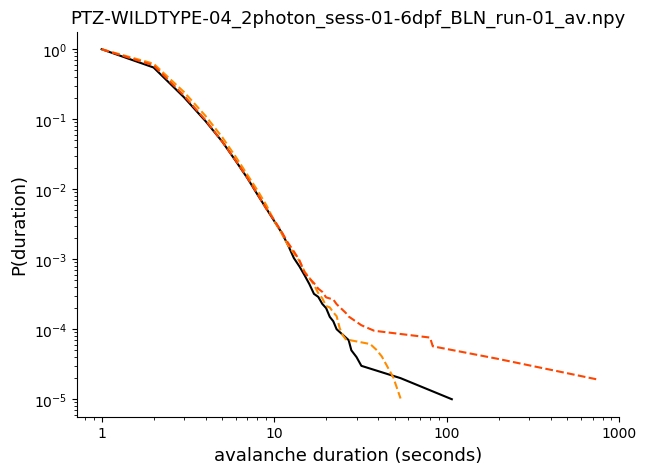

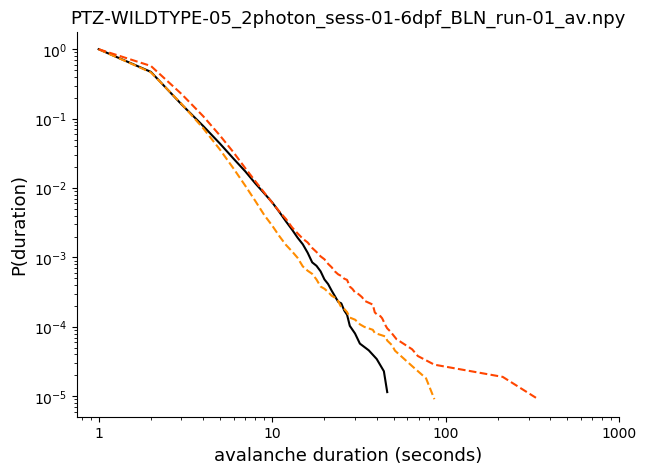

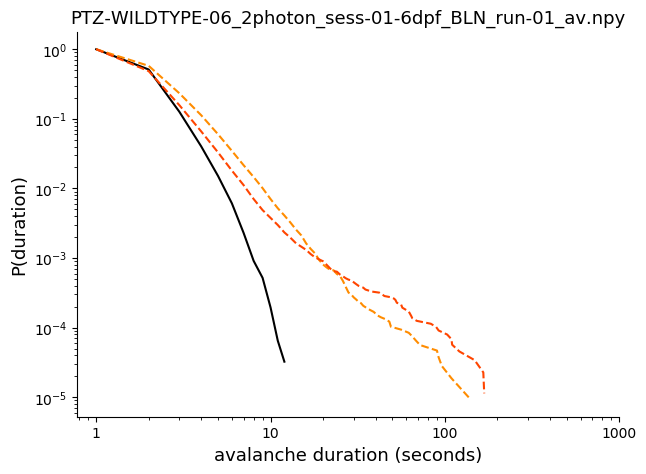

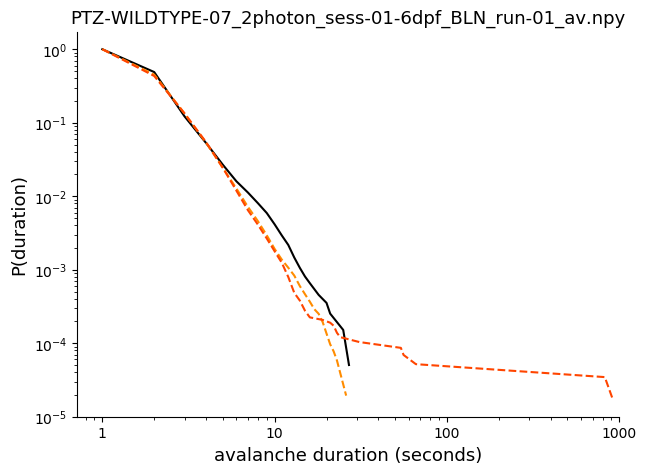

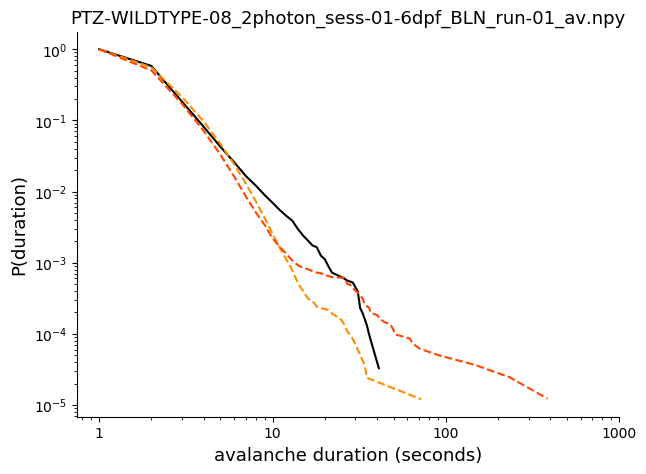

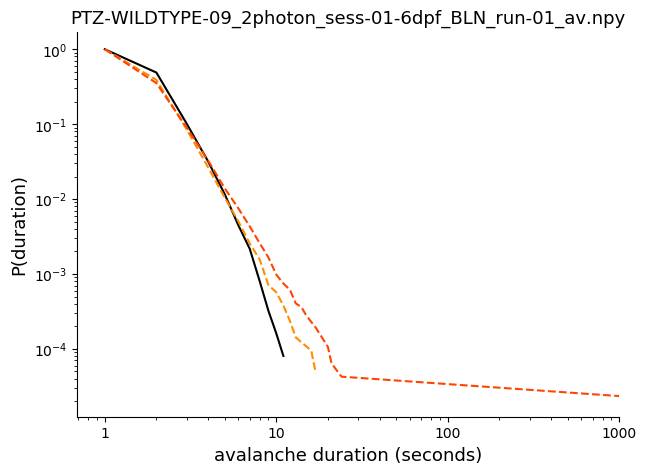

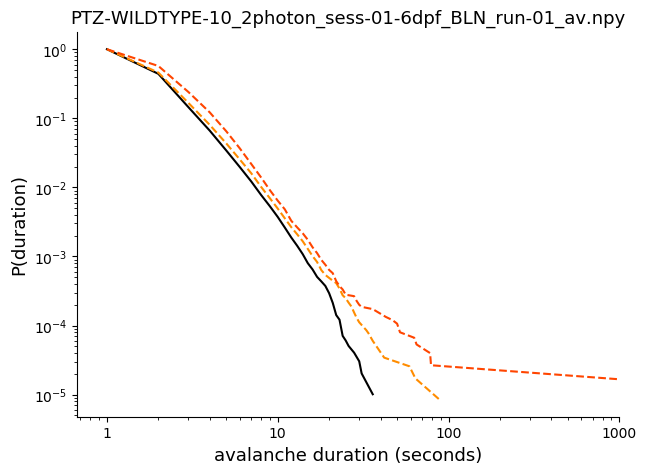

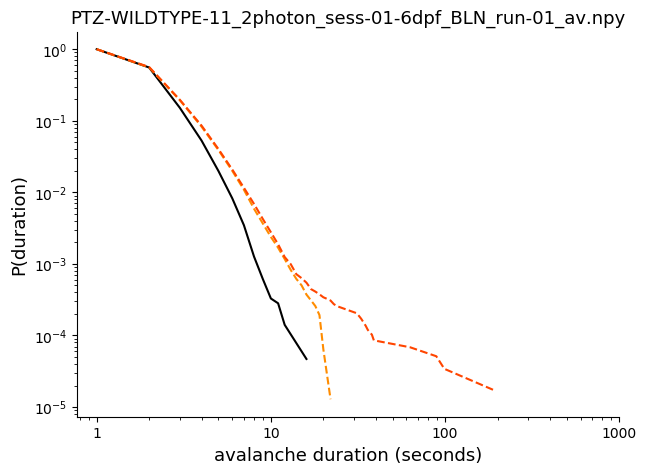

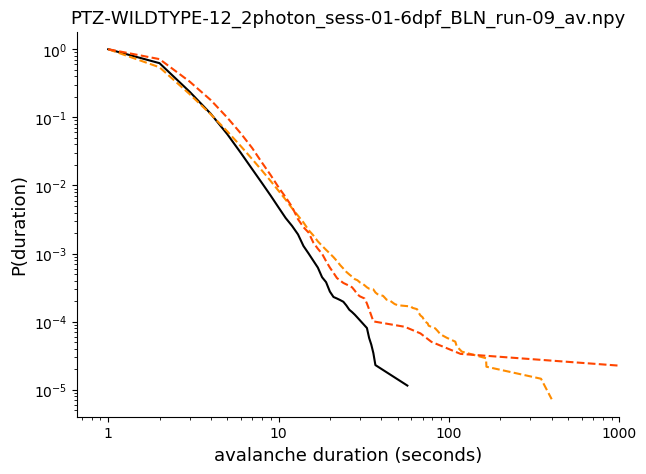

In [4]:
import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
colors = ['black', 'darkorange','orangered']
lines = ['-', '--', '--']
choose=1
for i in num1:
    os.chdir(Fdrop + 'Project/' + experiment)
    blnlist = sorted(glob.glob('*E-' + i + '*BLN*_av.npy*'))
    p5list = sorted(glob.glob('*E-' + i + '*PTZ05*_av.npy*'))
    p20list = sorted(glob.glob('*E-' + i + '*PTZ20*_av.npy*'))
    plotlist = [blnlist,p5list,p20list]
    fig, axarr = plt.subplots(figsize = (7,5))
    for e in range(len(plotlist)):
        avdistcut = np.load(plotlist[e][0])[choose]
        powerlaw.plot_ccdf(avdistcut, linestyle = lines[e],linewidth =1.5 , markersize = 1, alpha = 1, c = colors[e])
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    plt.xlim(right = 1000)  
    #plt.ylim(bottom = 0.000005)  
    axarr.set_title(str(blnlist[0]), size = '13')
    axarr.set_ylabel('P(duration)', size = '13')
    axarr.set_xlabel('avalanche duration (seconds)', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.show()

### KS distance 
* deviation from baseline critical distribution across all datasets

In [99]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
sblnlist = sorted(glob.glob('*BLN*size*marglik_power.npy*'))
sp5list = sorted(glob.glob('*PTZ05*size*marglik_power.npy*'))
sp20list = sorted(glob.glob('*PTZ20*size*marglik_power.npy*'))
dblnlist = sorted(glob.glob('*BLN*dur*marglik_power.npy*'))
dp5list = sorted(glob.glob('*PTZ05*dur*marglik_power.npy*'))
dp20list = sorted(glob.glob('*PTZ20*dur*marglik_power.npy*'))
blnavlist = sorted(glob.glob('*BLN*_av.npy*'))
p5avlist = sorted(glob.glob('*PTZ05*_av.npy*'))
p20avlist = sorted(glob.glob('*PTZ20*_av.npy*'))
p5avlist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_PTZ05_run-01_av.npy']

In [9]:
#SIZE - PTZ20 MARGINAL LIKELIHOODS
count=0
choose = 0
prac_blnexp = np.zeros(11)
num1 = adfn.name_zero('front', 2, 12, 1)
for i in num1:
    avlist =  sorted(glob.glob('*E-' + str(i) + '*PTZ05*_av.npy'))
    data = np.load(avlist[0])
    sizes=data[choose]
    M=len(sizes)
    a=min(sizes) #define xmin
    b=max(sizes) #define xmax
    npart = 2000 #number of particles - number of draws from prior distribution
    ln=IS_LN(npart)
    po=IS(npart)
    prac_blnexp[count] = po[0]
    count+=1
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[0]], 'short') + '_size_marglik_power.npy', po)
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[0]], 'short')  + '_size_marglik_log.npy', ln)
    print('Done fish ' + adfn.name_template([avlist[0]], 'short'))

Done fish PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01
Done fish PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ05_run-01
Done fish PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ05_run-01
Done fish PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ05_run-01
Done fish PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ05_run-01
Done fish PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ05_run-01
Done fish PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ05_run-01
Done fish PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ05_run-01
Done fish PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ05_run-01
Done fish PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ05_run-01
Done fish PTZ-WILDTYPE-12_2photon_sess-01-6dpf_PTZ05_run-01


In [10]:
#DUR - BASELINE MARGINAL LIKELIHOODS
count=0
choose = 1
prac_blnexp = np.zeros(11)
for i in num1:
    avlist =  sorted(glob.glob('*E-' + str(i) + '*PTZ05*_av.npy'))
    data = np.load(avlist[0])
    sizes=data[choose]
    a=2 #define xmin
    b=max(sizes) #define xmax
    M=len(sizes[np.where(sizes>a-1)])
    npart = 2000 #number of particles - number of draws from prior distribution
    ln=IS_LN(npart)
    po=IS(npart)
    prac_blnexp[count] = po[0]
    count+=1
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[0]], 'short') + '_dur_marglik_power.npy', po)
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[0]], 'short')  + '_dur_marglik_log.npy', ln)
    print('Done fish ' + adfn.name_template([avlist[0]], 'short'))

Done fish PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01
Done fish PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ05_run-01
Done fish PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ05_run-01
Done fish PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ05_run-01
Done fish PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ05_run-01
Done fish PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ05_run-01
Done fish PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ05_run-01
Done fish PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ05_run-01
Done fish PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ05_run-01
Done fish PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ05_run-01
Done fish PTZ-WILDTYPE-12_2photon_sess-01-6dpf_PTZ05_run-01


In [81]:
#SIZE - KS
ks = np.zeros((22, 2))
avlist = [p5avlist,p20avlist]
fli = list(range(11))
flist=[]
for i in range(11):
    fli[i] = 'F' + str(i+2)
for e in range(2):
    flist = np.append(flist, fli)

size_ptz_df = {}
count=0
choose = 0
for i in range(2):
    for y in range(11):
        ks[count] = stats.ks_2samp(np.load(blnavlist[y])[choose],np.load(avlist[i][y])[choose])
        count+=1
size_ptz_df = pd.DataFrame({"KS distance":ks[:,0] , "p":ks[:,1], "Labels":  np.append(adfn.repeat_list('PTZ 5mM',11),adfn.repeat_list('PTZ 20mM',11)), "Fish":flist})

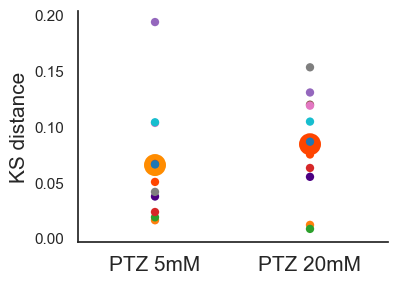

In [93]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['darkorange','orangered']
fig, ax = plt.subplots(figsize = (4,3))
ax = sns.pointplot(x="Labels", y="KS distance", data = size_ptz_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=1.8)
ax = sns.stripplot(x="Labels", y="KS distance", data=size_ptz_df, hue = 'Fish', palette = colors1, size = 6, jitter = False ,alpha = 1)
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('KS distance', size = '15')
ax.set_xticklabels(['PTZ 5mM', 'PTZ 20mM'], size = 15)
ax.legend_.remove()
#plt.hlines(1, -0.05 ,2, linestyle = '--', color = 'grey')
#plt.ylim(0.5,1.3)
plt.show()

In [96]:
#DUR - KS
ks = np.zeros((22, 2))
avlist = [p5avlist,p20avlist]
fli = list(range(11))
flist=[]
for i in range(11):
    fli[i] = 'F' + str(i+2)
for e in range(2):
    flist = np.append(flist, fli)
    
dur_ptz_df = {}
count=0
choose = 1
for i in range(2):
    for y in range(11):
        ks[count] = stats.ks_2samp(np.load(blnavlist[y])[choose],np.load(avlist[i][y])[choose])
        count+=1
dur_ptz_df = pd.DataFrame({"KS distance":ks[:,0] , "p":ks[:,1], "Labels":  np.append(adfn.repeat_list('PTZ 5mM',11),adfn.repeat_list('PTZ 20mM',11)), "Fish":flist})

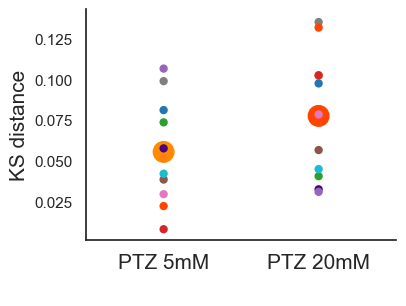

In [97]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['darkorange','orangered']
fig, ax = plt.subplots(figsize = (4,3))
ax = sns.pointplot(x="Labels", y="KS distance", data = dur_ptz_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=1.8)
ax = sns.stripplot(x="Labels", y="KS distance", data=dur_ptz_df, hue = 'Fish', palette = colors1, size = 6, jitter = False ,alpha = 1)
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('KS distance', size = '15')
ax.set_xticklabels(['PTZ 5mM', 'PTZ 20mM'], size = 15)
ax.legend_.remove()
#plt.hlines(1, -0.05 ,2, linestyle = '--', color = 'grey')
#plt.ylim(0.5,1.3)
plt.show()

### KS distance 
* Increase in avalanche size and duration during seizures

In [104]:
#SIZE - KS
exp = np.zeros((33))
avlist = [sblnlist, sp5list,sp20list]
fli = list(range(11))
flist=[]
for i in range(11):
    fli[i] = 'F' + str(i+2)
for e in range(3):
    flist = np.append(flist, fli)

sizexdf = {}
count=0
for i in range(len(avlist)):
    for y in range(11):
        exp[count] = np.load(avlist[i][y] ,allow_pickle=True)[0]
        count+=1
sizexdf = pd.DataFrame({"Exponent":exp , "Labels":  np.append(adfn.repeat_list('Baseline',11),np.append(adfn.repeat_list('PTZ 5mM',11),adfn.repeat_list('PTZ 20mM',11))), "Fish":flist})

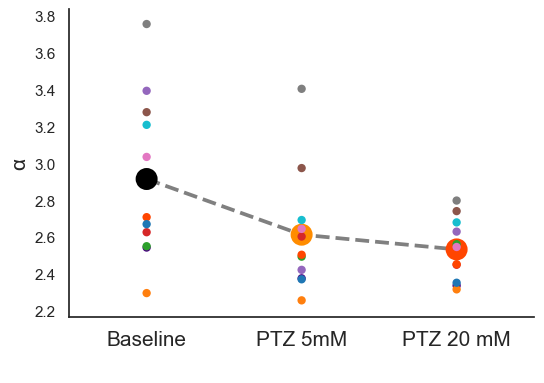

In [108]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['black','darkorange','orangered']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="Labels", y="Exponent", data = sizexdf, hue = 'Labels', palette = colors2, join=True, ci=0, scale=1.8)
ax = sns.stripplot(x="Labels", y="Exponent", data=sizexdf, hue = 'Fish', palette = colors1, size = 6, jitter = False ,alpha = 1)
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('α', size = '15')
ax.set_xticklabels(['Baseline', 'PTZ 5mM', 'PTZ 20 mM'], size = 15)
ax.legend_.remove()
#plt.hlines(1, -0.05 ,2, linestyle = '--', color = 'grey')
#plt.ylim(0.5,1.3)
plt.show()

In [114]:
0.05/2

0.025

In [116]:
mydf = sizexdf
p = np.zeros((2,2))
nulist = ['PTZ 5mM', 'PTZ 20mM']
for i in range(len(nulist)):
    p[i] = stats.ttest_rel(mydf['Exponent'].where(mydf['Labels'] == 'Baseline').dropna(),mydf['Exponent'].where(mydf['Labels'] == nulist[i]).dropna())
p

array([[3.68500472e+00, 4.21142982e-03],
       [4.12306228e+00, 2.06695772e-03]])

In [109]:
#DUR - KS
exp = np.zeros((33))
avlist = [dblnlist, dp5list,dp20list]
fli = list(range(11))
flist=[]
for i in range(11):
    fli[i] = 'F' + str(i+2)
for e in range(3):
    flist = np.append(flist, fli)

durexdf = {}
count=0
for i in range(len(avlist)):
    for y in range(11):
        exp[count] = np.load(avlist[i][y] ,allow_pickle=True)[0]
        count+=1
durexdf = pd.DataFrame({"Exponent":exp , "Labels":  np.append(adfn.repeat_list('Baseline',11),np.append(adfn.repeat_list('PTZ 5mM',11),adfn.repeat_list('PTZ 20mM',11))), "Fish":flist})

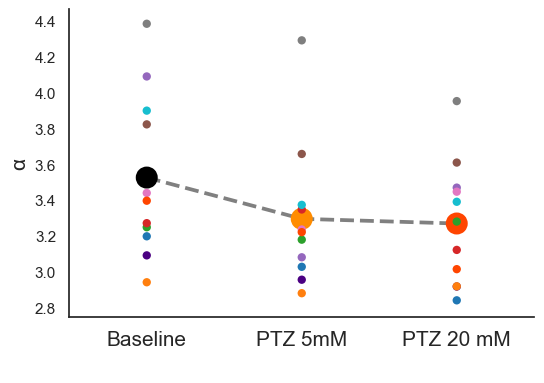

In [111]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['black','darkorange','orangered']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="Labels", y="Exponent", data = durexdf, hue = 'Labels', palette = colors2, join=True, ci=0, scale=1.8)
ax = sns.stripplot(x="Labels", y="Exponent", data=durexdf, hue = 'Fish', palette = colors1, size = 6, jitter = False ,alpha = 1)
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.pointplot(x="Labels", y="Exponent", data=durexdf, color = 'grey', linestyles = ["--"], ci = 0)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('α', size = '15')
ax.set_xticklabels(['Baseline', 'PTZ 5mM', 'PTZ 20 mM'], size = 15)
ax.legend_.remove()
#plt.hlines(1, -0.05 ,2, linestyle = '--', color = 'grey')
#plt.ylim(0.5,1.3)
plt.show()

In [117]:
mydf = durexdf
p = np.zeros((2,2))
nulist = ['PTZ 5mM', 'PTZ 20mM']
for i in range(len(nulist)):
    p[i] = stats.ttest_rel(mydf['Exponent'].where(mydf['Labels'] == 'Baseline').dropna(),mydf['Exponent'].where(mydf['Labels'] == nulist[i]).dropna())
p

array([[2.57067074e+00, 2.78585956e-02],
       [3.88115359e+00, 3.05319395e-03]])

## Branching ratio
* Branching ratio increases during seizures beyond critical point

In [41]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnbranchlist = sorted(glob.glob('*BLN*branch*'))
p5branchlist = sorted(glob.glob('*PTZ05*branch*'))
p20branchlist = sorted(glob.glob('*PTZ20*branch*'))
blnbranchlist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09__branch.npy']

In [42]:
import pandas as pd
all_list = [blnbranchlist, p5branchlist, p20branchlist]
blist = adfn.list_of_list(3,0)
for t in range(len(blist)):
    for i in range(len(blnbranchlist)):
        blist[t] = np.append(blist[t], np.load(all_list[t][i]))


fli = list(range(11))
flist=[]
for i in range(11):
    fli[i] = 'F' + str(i+2)
for e in range(3):
    flist = np.append(flist, fli)
branchdic = {
  "branch ratio": np.append(np.append(blist[0], blist[1]),blist[2]), "condition": np.append(np.append(adfn.repeat_list('baseline',11),adfn.repeat_list('PTZ 5mM',11)),adfn.repeat_list('PTZ 20mM',11)), "Fish": flist}
branchdf = pd.DataFrame(branchdic)

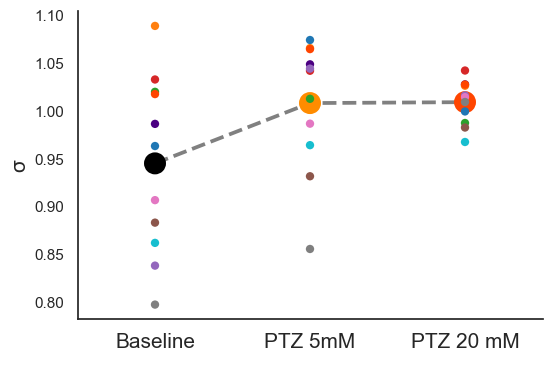

In [55]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['black','darkorange','orangered']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="condition", y="branch ratio", data = branchdf, hue = 'condition', palette = colors2, join=True, ci=0, scale=1.8)
ax = sns.stripplot(x="condition", y="branch ratio", data=branchdf, hue = 'Fish', palette = colors1, size = 6, jitter = False ,alpha = 1)
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.pointplot(x="condition", y="branch ratio", data=branchdf, color = 'grey', linestyles = ["--"], ci = 0)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('σ', size = '15')
ax.set_xticklabels(['Baseline', 'PTZ 5mM', 'PTZ 20 mM'], size = 15)
ax.legend_.remove()
#plt.hlines(1, -0.05 ,2, linestyle = '--', color = 'grey')
#plt.ylim(0.5,1.3)
plt.show()

In [57]:
0.05/2

0.025

In [61]:
mydf = branchdf
p = np.zeros((2,2))
nulist = ['PTZ 5mM', 'PTZ 20mM']
for i in range(len(nulist)):
    p[i] = stats.ttest_rel(mydf['branch ratio'].where(mydf['condition'] == 'baseline').dropna(),mydf['branch ratio'].where(mydf['condition'] == nulist[i]).dropna())
p

array([[-3.29338559,  0.00810354],
       [-2.49702798,  0.03160737]])

In [ ]:
count = 0
for column in branchpairdf.drop('condition', axis=1):
    ax = sns.lineplot(x="condition", y=column, data = branchpairdf, color = 'grey')
    ax.lines[count].set_linestyle("--")
    count+=1
ax = sns.stripplot(x="condition", y="branch ratio", data=branchdf, palette = colors, linewidth = 0.4, jitter = False, size = 7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylim(0.5, 1.2)
plt.show()

## PTZ20 vs nulls
* Null 1 - shuffle all - does a completely stochastic system generate avalanches?
* Null 2 - neighbour swap - is the spatial structure of cells important for generating critical avalanche dynamics?
* Null 3 - phase slide - is the temporal structure of cell firing important for generating critical avalanche dynamics?
* Null 4 - autocorrelation remove - is the signal memory of each active unit required for activity to spread? 

In [57]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
ptzlist = sorted(glob.glob('*PTZ20*_av.npy*'))
swaplist = sorted(glob.glob('*PTZ20*swap*'))
shufflelist = sorted(glob.glob('*PTZ20*shuff*'))
slidelist = sorted(glob.glob('*PTZ20*slide*'))
autolist = sorted(glob.glob('*PTZ20*auto*'))

/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collectio

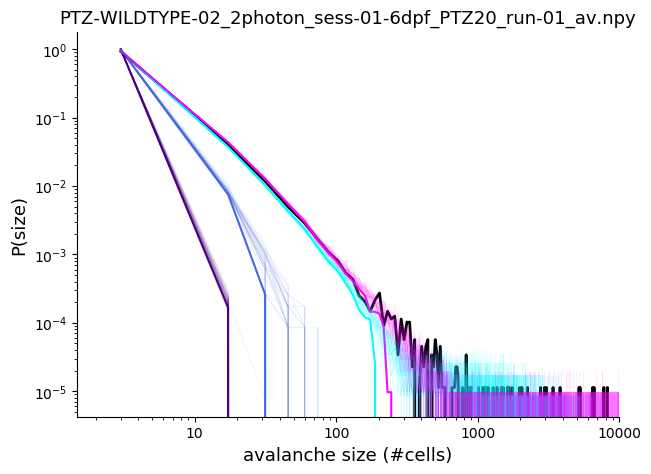

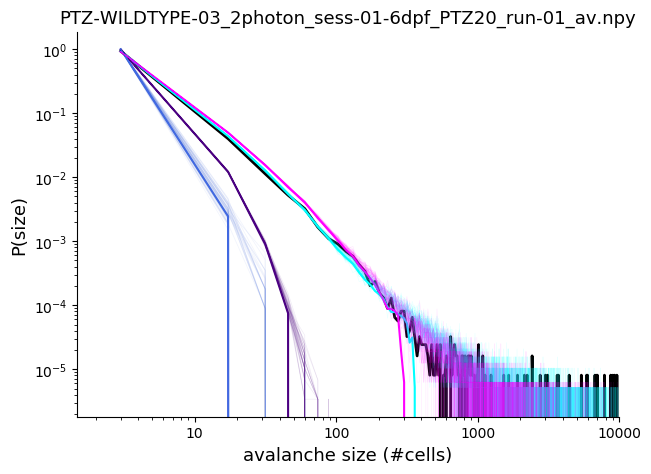

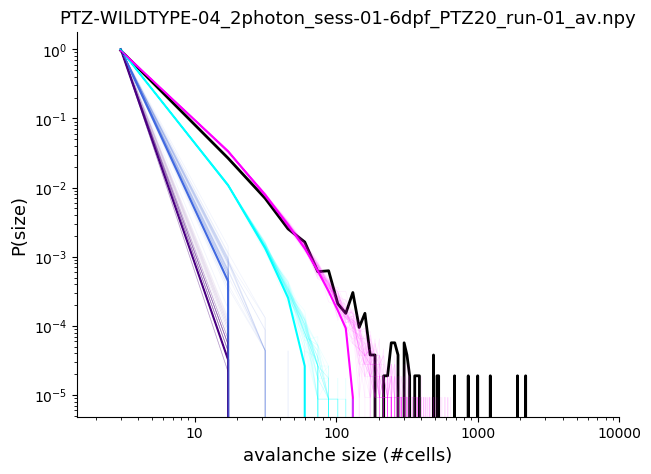

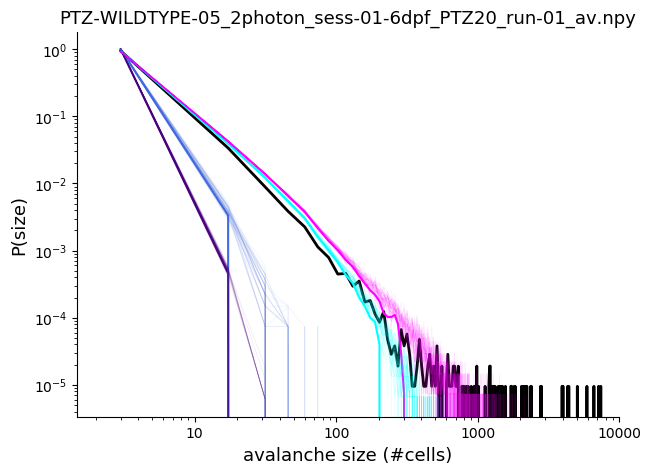

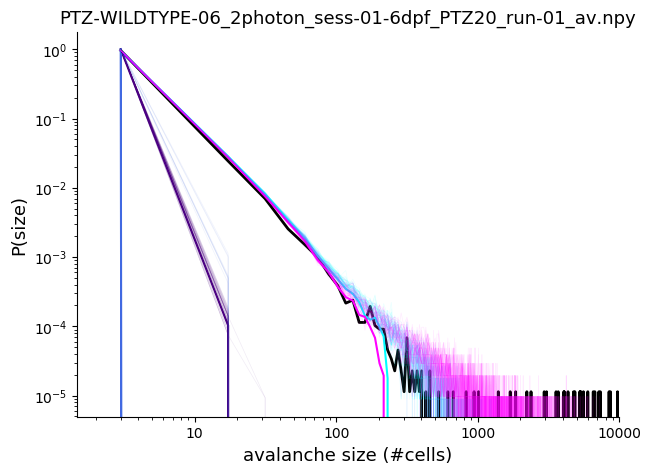

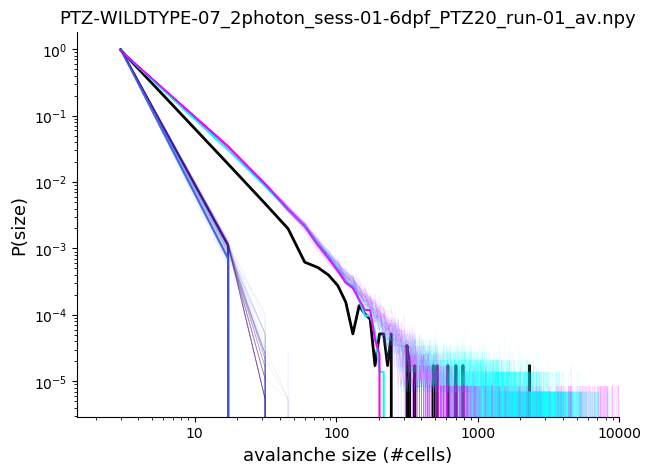

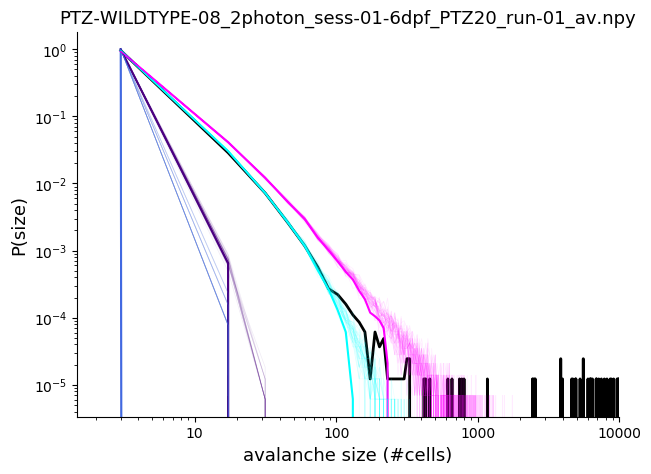

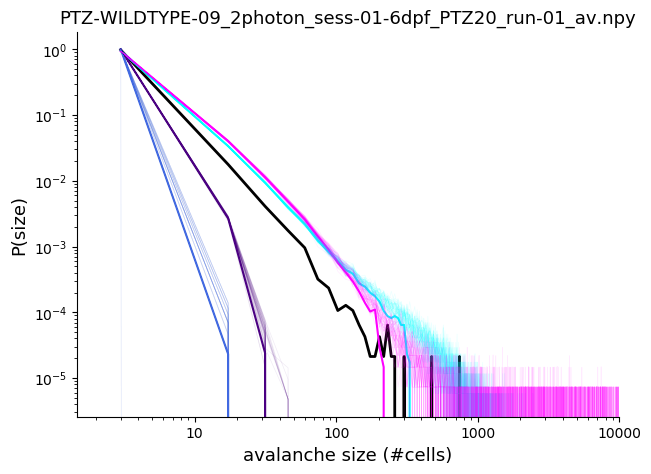

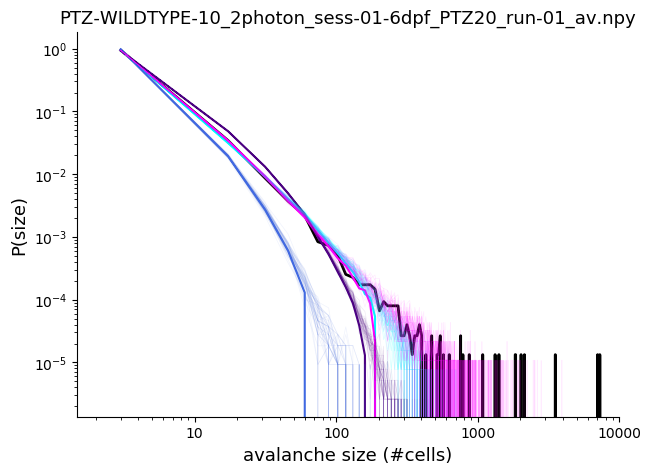

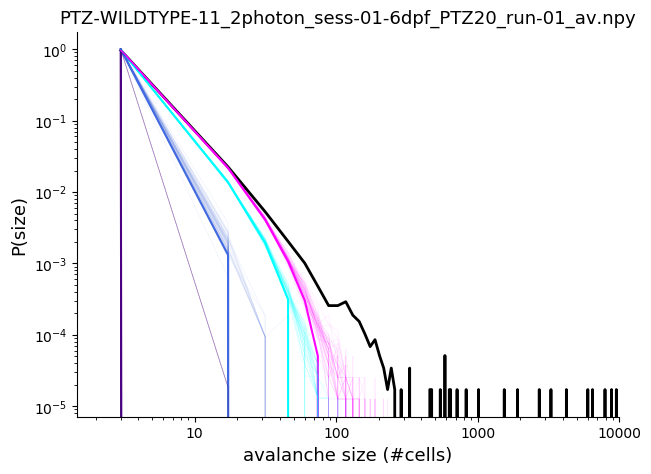

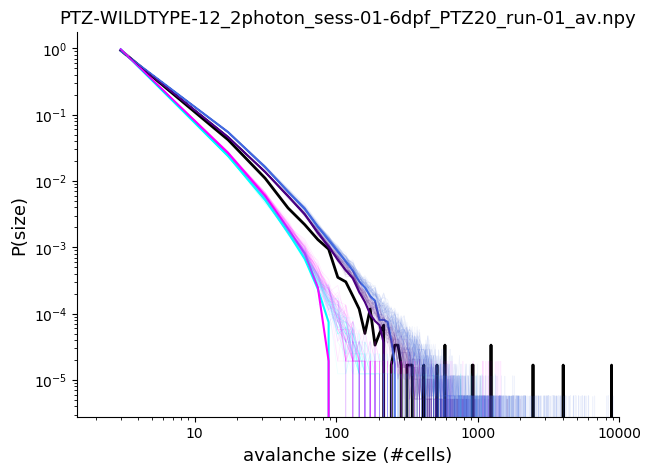

In [6]:
sns.reset_orig()
import matplotlib
num1 = adfn.name_zero('front',2,12,1)
colors = ['black', 'indigo','royalblue','cyan', 'magenta']
nbins = 340000
choose=0
binvec = np.load(Fdrop + 'Project/' + experiment + os.sep + 'size_ptz20_null_combvec.npy')
maxi, mini = np.max(binvec), np.min(binvec)
for i in num1:
    os.chdir(Fdrop + 'Project/' + experiment)
    blnlist = sorted(glob.glob('*E-' + i + '*PTZ20*_av.npy*'))
    swaplist = sorted(glob.glob('*E-' + i + '*PTZ20*swap*'))
    shufflelist = sorted(glob.glob('*E-' + i + '*PTZ20*shuff*'))
    slidelist = sorted(glob.glob('*E-' + i + '*PTZ20*slide*'))
    autolist = sorted(glob.glob('*E-' + i + '*PTZ20*auto*'))
    fig, axarr = plt.subplots(figsize = (7,5))
    shuffvec, swapvec, slidevec, autovec =[],[],[],[]
    veclist = [shuffvec, swapvec, autovec, slidevec]
    nulist = [shufflelist, swaplist, autolist, slidelist]
    avdistcut = np.load(blnlist[0])[0]
    binned=np.linspace(mini,maxi, nbins)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 2, markersize = 1, alpha = 1, c = colors[0])
    for e in range(len(nulist)):
        mean_null = adfn.mean_distribution(nulist[e], choose)
        binned = np.linspace(mini,maxi,nbins)
        hist = np.histogram(mean_null, bins = binned)
        xaxis = hist[1][:-1]
        yaxis = hist[0]/np.sum(hist[0])
        axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1, c = colors[e+1])
    for e in range(len(veclist)):
        for t in range(len(nulist[e])):
            binned = np.linspace(mini,maxi,nbins)
            hist = np.histogram(np.load(nulist[e][t])[0], bins = binned)
            xaxis = hist[1][:-1]
            yaxis = hist[0]/np.sum(hist[0])
            axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 0.5, markersize = 1, alpha = 0.08, c = colors[e+1])
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    plt.xlim(right = 10000)  
    #plt.ylim(bottom = 0.000005)  
    axarr.set_title(str(blnlist[0]), size = '13')
    axarr.set_ylabel('P(size)', size = '13')
    axarr.set_xlabel('avalanche size (#cells)', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.show()

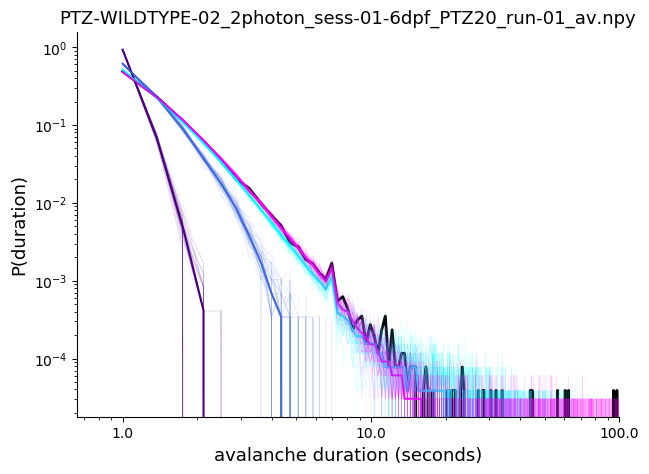

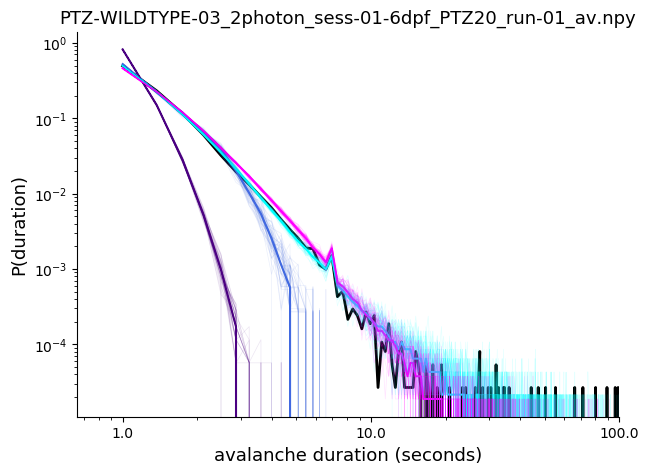

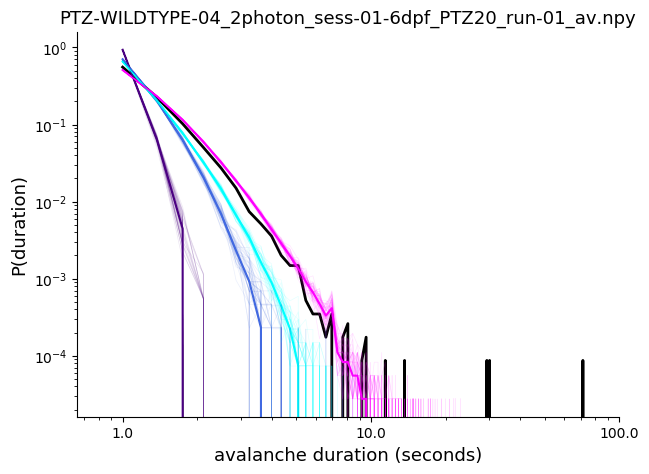

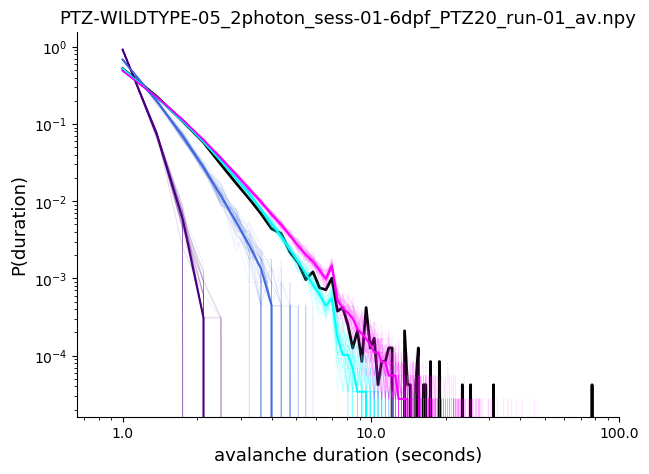

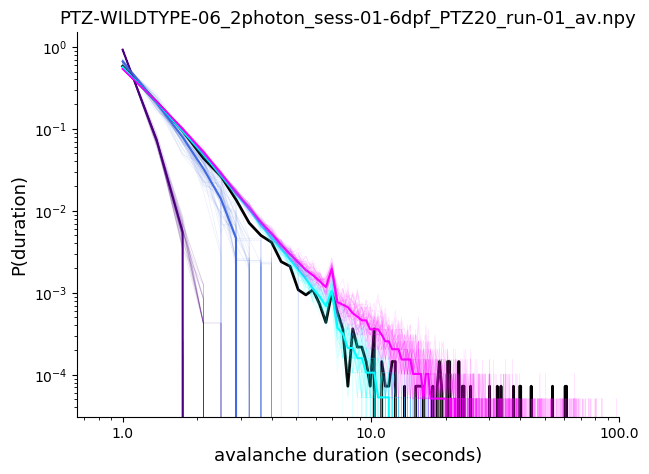

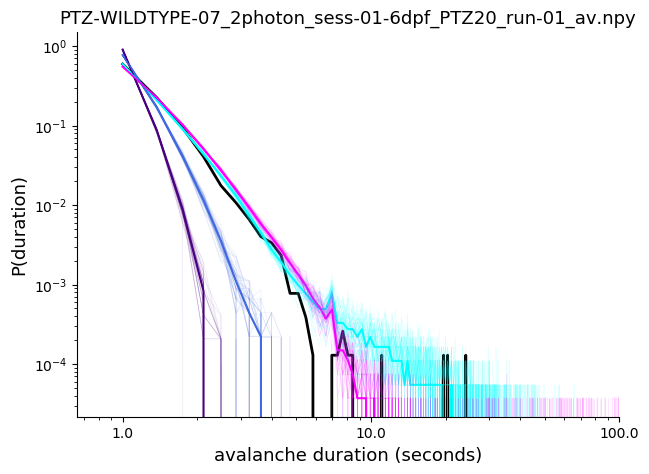

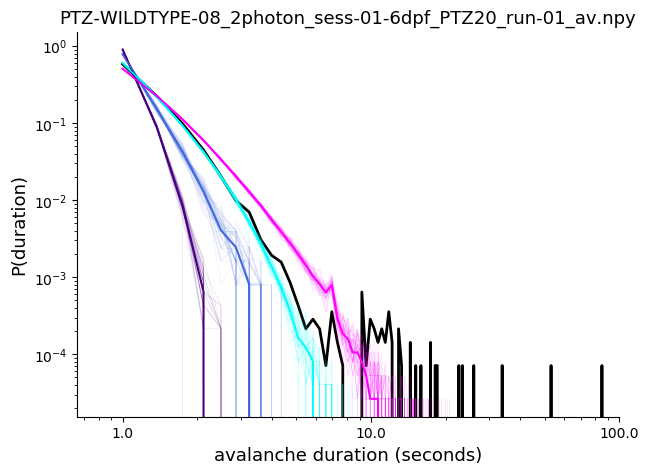

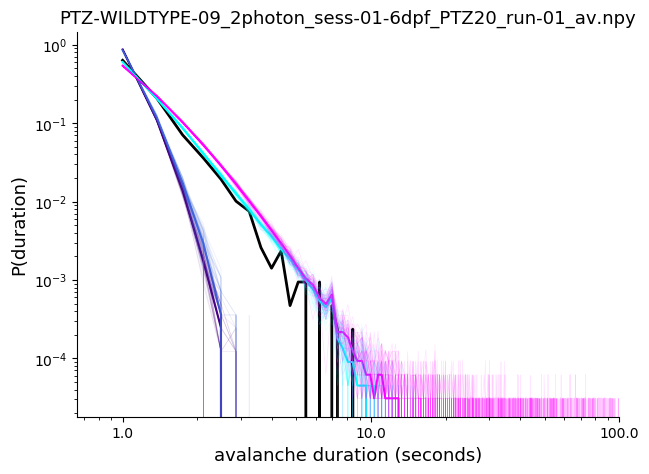

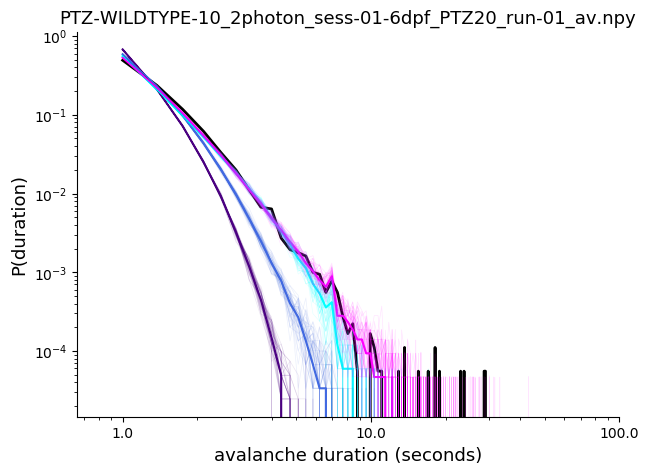

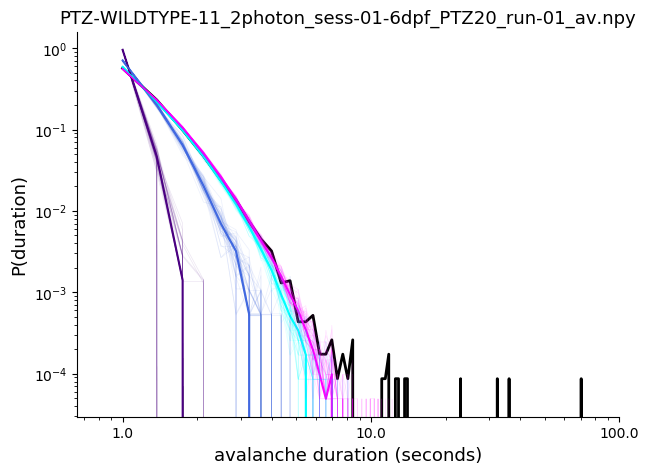

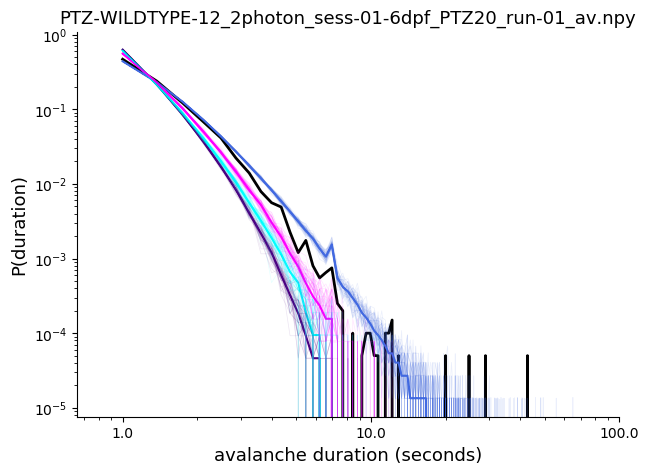

In [9]:
num1 = adfn.name_zero('front',2,12,1)
colors = ['black', 'indigo','royalblue','cyan', 'magenta']
nbins = 13200
choose=1
dur_binvec = np.load(Fdrop + 'Project/' + experiment + os.sep + 'dur_ptz20_null_combvec.npy')
maxi, mini = np.max(dur_binvec), np.min(dur_binvec)
for i in num1:
    os.chdir(Fdrop + 'Project/' + experiment)
    blnlist = sorted(glob.glob('*E-' + i + '*PTZ20*_av.npy*'))
    swaplist = sorted(glob.glob('*E-' + i + '*PTZ20*swap*'))
    shufflelist = sorted(glob.glob('*E-' + i + '*PTZ20*shuff*'))
    slidelist = sorted(glob.glob('*E-' + i + '*PTZ20*slide*'))
    autolist = sorted(glob.glob('*E-' + i + '*PTZ20*auto*'))
    fig, axarr = plt.subplots(figsize = (7,5))
    frameon=False
    shuffvec, swapvec, slidevec, autovec =[],[],[],[]
    veclist = [shuffvec, swapvec, autovec, slidevec]
    nulist = [shufflelist, swaplist, autolist, slidelist]
    avdistcut = (1/2.73)*np.load(blnlist[0])[1]
    binned=np.linspace(mini,maxi, nbins)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 2, markersize = 1, alpha = 1, c = colors[0])
    for e in range(len(nulist)):
        mean_null = adfn.mean_distribution(nulist[e], choose)
        binned = np.linspace(mini,maxi,nbins)
        hist = np.histogram((1/2.73)*mean_null, bins = binned)
        xaxis = hist[1][:-1]
        yaxis = hist[0]/np.sum(hist[0])
        axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1, c = colors[e+1])
    for e in range(len(nulist)):
        for t in range(len(nulist[e])):
            binned = np.linspace(mini,maxi,nbins)
            hist = np.histogram((1/2.73)*np.load(nulist[e][t])[1], bins = binned)
            xaxis = hist[1][:-1]
            yaxis = hist[0]/np.sum(hist[0])
            axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 0.5, markersize = 1, alpha = 0.1, c = colors[e+1])
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    plt.xlim(right = 100)  
    #plt.ylim(bottom = 0.000005)  
    axarr.set_title(str(blnlist[0]), size = '13')
    axarr.set_ylabel('P(duration)', size = '13')
    axarr.set_xlabel('avalanche duration (seconds)', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.show()

### ks distance
* Which null distributions are more important to generate critical avalanche dynamics
* Size - spatial structure important - temporal structure no longer important
* Duration - spatial structure and temporal structure equally important 

* {for each fish - generate an average distribution, find ks distance of each point to that distribution}
* {for each baseline, quantify how far the baseline deviaties from that value - plot that ks distance (significant if > 1.96 sd from null mean)}


In [10]:
# PLOT - average whole brain fluorescence
#----------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
size_powlist = sorted(glob.glob('*PTZ20*size*_power*'))
size_loglist = sorted(glob.glob('*PTZ20*size*_log*'))
dur_powlist = sorted(glob.glob('*PTZ20*dur*_power*'))
dur_loglist = sorted(glob.glob('*PTZ20*dur*_log*'))
dur_powlist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_dur_marglik_power.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_dur_marglik_power.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_dur_marglik_power.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_dur_marglik_power.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ20_run-01_dur_marglik_power.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_dur_marglik_power.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ20_run-01_dur_marglik_power.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ20_run-01_dur_marglik_power.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ20_run-01_dur_marglik_power.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ20_run-01_dur_marglik_power.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_PTZ20_run-01_dur_marglik_power.npy']

In [188]:
#SIZE - PTZ20 MARGINAL LIKELIHOODS
count=0
choose = 0
prac_blnexp = np.zeros(11)
for i in num1:
    avlist =  sorted(glob.glob('*E-' + str(i) + '*PTZ20*_av.npy'))
    data = np.load(avlist[0])
    sizes=data[choose]
    M=len(sizes)
    a=min(sizes) #define xmin
    b=max(sizes) #define xmax
    npart = 2000 #number of particles - number of draws from prior distribution
    ln=IS_LN(npart)
    po=IS(npart)
    prac_blnexp[count] = po[0]
    count+=1
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[0]], 'short') + '_size_marglik_power.npy', po)
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[0]], 'short')  + '_size_marglik_log.npy', ln)
    print('Done fish ' + adfn.name_template([avlist[0]], 'short'))

Done fish PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01
Done fish PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01
Done fish PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01
Done fish PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01
Done fish PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ20_run-01
Done fish PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01
Done fish PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ20_run-01
Done fish PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ20_run-01
Done fish PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ20_run-01
Done fish PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ20_run-01
Done fish PTZ-WILDTYPE-12_2photon_sess-01-6dpf_PTZ20_run-01


In [189]:
#DUR - BASELINE MARGINAL LIKELIHOODS
count=0
choose = 1
prac_blnexp = np.zeros(11)
for i in num1:
    avlist =  sorted(glob.glob('*E-' + str(i) + '*PTZ20*_av.npy'))
    data = np.load(avlist[0])
    sizes=data[choose]
    a=2 #define xmin
    b=max(sizes) #define xmax
    M=len(sizes[np.where(sizes>a-1)])
    npart = 2000 #number of particles - number of draws from prior distribution
    ln=IS_LN(npart)
    po=IS(npart)
    prac_blnexp[count] = po[0]
    count+=1
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[0]], 'short') + '_dur_marglik_power.npy', po)
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[0]], 'short')  + '_dur_marglik_log.npy', ln)
    print('Done fish ' + adfn.name_template([avlist[0]], 'short'))

Done fish PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01
Done fish PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01
Done fish PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01
Done fish PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01
Done fish PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ20_run-01
Done fish PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01
Done fish PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ20_run-01
Done fish PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ20_run-01
Done fish PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ20_run-01
Done fish PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ20_run-01
Done fish PTZ-WILDTYPE-12_2photon_sess-01-6dpf_PTZ20_run-01


In [7]:
#EXP - average exponent for each null
from scipy import stats
ks_list = adfn.list_of_list(22,4)
nullexp_list = adfn.list_of_list(22,4)
mode = [0,1]
count=0
num1 = adfn.name_zero('front', 2, 12, 1)
for y in range(2):
    for i in num1:
        os.chdir(Fdrop + 'Project/' + experiment)
        bln = np.load(sorted(glob.glob('*E-' + i + '*PTZ20*_av.npy*'))[0])
        swaplist = sorted(glob.glob('*E-' + i + '*PTZ20*swap*'))
        shufflelist = sorted(glob.glob('*E-' + i + '*PTZ20*shuff*'))
        autolist = sorted(glob.glob('*E-' + i + '*PTZ20*auto*'))
        slidelist = sorted(glob.glob('*E-' + i + '*PTZ20*slide*'))
        null_list = [shufflelist, swaplist,autolist,slidelist]
        for f in range(len(null_list)):
            mean_null = adfn.mean_distribution(null_list[f], mode[y])
            ks_list[count][f] = crfn.ks_compare(null_list[f], mean_null, bln, mode[y], len(null_list[f]))
            if mode[y] == 0:
                data = mean_null
                sizes=data
                M=len(sizes)
                a=min(sizes) #define xmin
                b=max(sizes) #define xmax
                npart = 2000 #number of particles - number of draws from prior distribution
                ln=isfn.IS_LN(npart, sizes, M, a, b)
                po=isfn.IS(npart, sizes,M, a, b)
                nullexp_list[count][f] = po[0]
            if mode[y] == 1:
                data = mean_null
                sizes=data
                a=2 #define xmin
                b=max(sizes) #define xmax
                M=len(sizes[np.where(sizes>a-1)])
                npart = 2000 #number of particles - number of draws from prior distribution
                ln=isfn.IS_LN(npart, sizes,M, a, b)
                po=isfn.IS(npart, sizes, M, a, b)
                nullexp_list[count][f] = po[0]
        count+=1
        print('Done fish ' + str(i))

Done fish 02
Done fish 03
Done fish 04
Done fish 05
Done fish 06
Done fish 07
Done fish 08
Done fish 09
Done fish 10
Done fish 11
Done fish 12
Done fish 02
Done fish 03
Done fish 04
Done fish 05
Done fish 06
Done fish 07
Done fish 08
Done fish 09
Done fish 10
Done fish 11
Done fish 12


In [51]:
#KS distance
fli = list(range(11))
flist=[]
for i in range(11):
    fli[i] = 'F' + str(i+2)
for e in range(4):
    flist = np.append(flist, fli)
    
#Null append
sizeks, durks, lab = [],[],[]
nulist = ['Time + Cell shuffle', 'Cell shuffle','Time shuffle', 'Time permute']
for e in range(len(nulist)):
    for f in range(11):
        sizeks = np.append(sizeks, ks_list[f][e][0])
        durks =  np.append(durks, ks_list[f+11][e][0])
        lab = np.append(lab, nulist[e])

sksdf = pd.DataFrame({ "KS distance": sizeks, "Labels": lab, 'Fish': flist})
dksdf = pd.DataFrame({ "KS distance": durks, "Labels": lab, 'Fish': flist})

In [52]:
0.05/5

0.008333333333333333

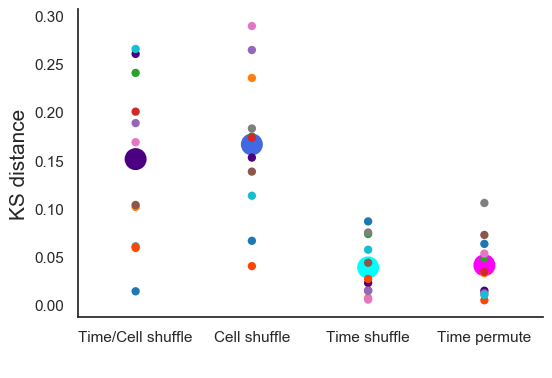

In [53]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['indigo','royalblue','cyan', 'magenta']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.stripplot(x="Labels", y="KS distance", data=sksdf, hue = 'Fish', palette = colors1, size = 6, jitter = False ,alpha = 1)
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)

ax = sns.pointplot(x="Labels", y="KS distance", data=sksdf, hue = 'Labels', palette = colors2, join=False, ci=0, scale=1.8)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('KS distance', size = '15')
ax.set_xticklabels(['Time/Cell shuffle', 'Cell shuffle', 'Time shuffle', 'Time permute'], size = 11)
ax.legend_.remove()
plt.show()

In [54]:
mydf = sksdf
plist = list(range(4))
nulist = ['Time + Cell shuffle', 'Cell shuffle','Time shuffle', 'Time permute']
for i in range(len(nulist)):
    p = np.zeros((4,2))
    for e in range(4):
        p[e] = stats.ttest_rel(mydf['KS distance'].where(mydf['Labels'] == nulist[i]).dropna(),mydf['KS distance'].where(mydf['Labels'] == nulist[e]).dropna())
        plist[i] = p
plist

[array([[        nan,         nan],
        [-0.51916997,  0.61493727],
        [ 3.73757492,  0.00386192],
        [ 3.41740701,  0.00657599]]),
 array([[5.19169973e-01, 6.14937274e-01],
        [           nan,            nan],
        [4.39560613e+00, 1.34424998e-03],
        [5.19396646e+00, 4.04812172e-04]]),
 array([[-3.73757492e+00,  3.86191805e-03],
        [-4.39560613e+00,  1.34424998e-03],
        [            nan,             nan],
        [-2.43919436e-01,  8.12224564e-01]]),
 array([[-3.41740701e+00,  6.57599054e-03],
        [-5.19396646e+00,  4.04812172e-04],
        [ 2.43919436e-01,  8.12224564e-01],
        [            nan,             nan]])]

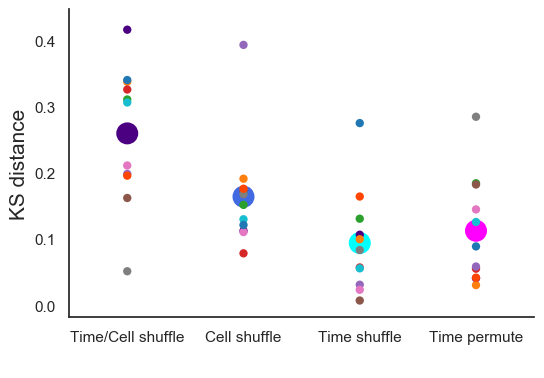

In [55]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['indigo','royalblue','cyan', 'magenta']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.stripplot(x="Labels", y="KS distance", data=dksdf, hue = 'Fish', palette = colors1, size = 6, jitter = False ,alpha = 1)
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)

ax = sns.pointplot(x="Labels", y="KS distance", data=dksdf, hue = 'Labels', palette = colors2, join=False, ci=0, scale=1.8)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('KS distance', size = '15')
ax.set_xticklabels(['Time/Cell shuffle', 'Cell shuffle', 'Time shuffle', 'Time permute'], size = 11)
ax.legend_.remove()
plt.show()

In [56]:
mydf = dksdf
plist = list(range(4))
nulist = ['Time + Cell shuffle', 'Cell shuffle','Time shuffle', 'Time permute']
for i in range(len(nulist)):
    p = np.zeros((4,2))
    for e in range(4):
        p[e] = stats.ttest_rel(mydf['KS distance'].where(mydf['Labels'] == nulist[i]).dropna(),mydf['KS distance'].where(mydf['Labels'] == nulist[e]).dropna())
        plist[i] = p
plist

[array([[           nan,            nan],
        [2.04249446e+00, 6.83615284e-02],
        [5.19382890e+00, 4.04892710e-04],
        [2.89112664e+00, 1.60761125e-02]]),
 array([[-2.04249446,  0.06836153],
        [        nan,         nan],
        [ 1.84835593,  0.09429891],
        [ 1.39691036,  0.19266558]]),
 array([[-5.19382890e+00,  4.04892710e-04],
        [-1.84835593e+00,  9.42989095e-02],
        [            nan,             nan],
        [-5.01676717e-01,  6.26754973e-01]]),
 array([[-2.89112664,  0.01607611],
        [-1.39691036,  0.19266558],
        [ 0.50167672,  0.62675497],
        [        nan,         nan]])]

### EXPONENT

* which null distributions increase/decrease avalanche number?
* Cell location reduces avalanche size/duration, time structure and autocorrelation unimportant in seizure avalanches

In [34]:
#EXPONENT - Baseline append
ptzexp, ptzlab = [],[]
ptzlist = [size_powlist, dur_powlist]
for i in range(len(ptzlist)):
    for e in range(len(ptzlist[i])):
        ptzexp = np.append(ptzexp, np.load(ptzlist[i][e], allow_pickle=True)[0])
ptzlab = adfn.repeat_list('Baseline', 22)

#Make fish name list
fli = list(range(11))
flist=[]
for i in range(11):
    fli[i] = 'F' + str(i+2)
for e in range(5):
    flist = np.append(flist, fli)

#Null append
sizex, durx, lab = [],[],[]
nulist = ['Time + Cell shuffle', 'Cell shuffle','Time shuffle', 'Time permute']
for e in range(len(nulist)):
    for f in range(11):
        sizex = np.append(sizex, nullexp_list[f][e])
        durx =  np.append(durx, nullexp_list[f+11][e])
        lab = np.append(lab, nulist[e])

#Append together 
labcomb = np.append(ptzlab[:11],lab)            
sizecomb = np.append(ptzexp[:11], sizex)
durcomb = np.append(ptzexp[11:], durx)

sxdf = pd.DataFrame({ "Exponent": sizecomb, "Labels": labcomb, 'Fish': flist})
dxdf = pd.DataFrame({ "Exponent": durcomb, "Labels": labcomb, 'Fish': flist})

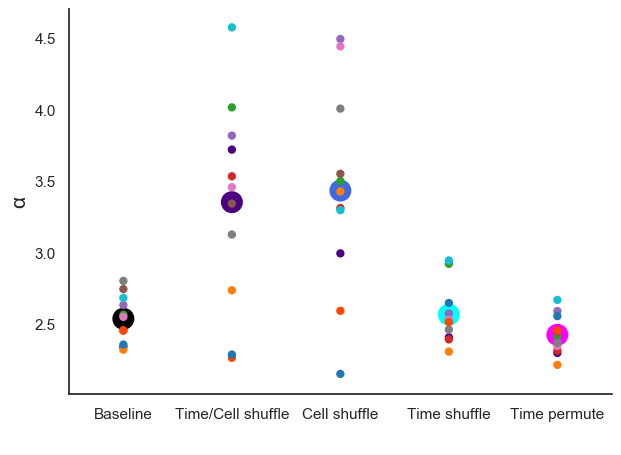

In [42]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['black', 'indigo','royalblue','cyan', 'magenta']
fig, ax = plt.subplots(figsize = (7,5))
ax = sns.stripplot(x="Labels", y="Exponent", data=sxdf, hue = 'Fish', palette = colors1, size = 6, jitter = False ,alpha = 1)
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)

ax = sns.pointplot(x="Labels", y="Exponent", data=sxdf, hue = 'Labels', palette = colors2, join=False, ci=0, scale=1.8)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('α', size = '15')
ax.set_xticklabels(['Baseline', 'Time/Cell shuffle', 'Cell shuffle', 'Time shuffle', 'Time permute'], size = 11)
ax.legend_.remove()
plt.show()

In [11]:
mydf = sxdf
p = np.zeros((4,2))
nulist = ['Time + Cell shuffle', 'Cell shuffle','Time shuffle', 'Time permute']
for i in range(len(nulist)):
    p[i] = stats.ttest_rel(mydf['Exponent'].where(mydf['Labels'] == 'Baseline').dropna(),mydf['Exponent'].where(mydf['Labels'] == nulist[i]).dropna())
p[3]

NameError: name 'sxdf' is not defined

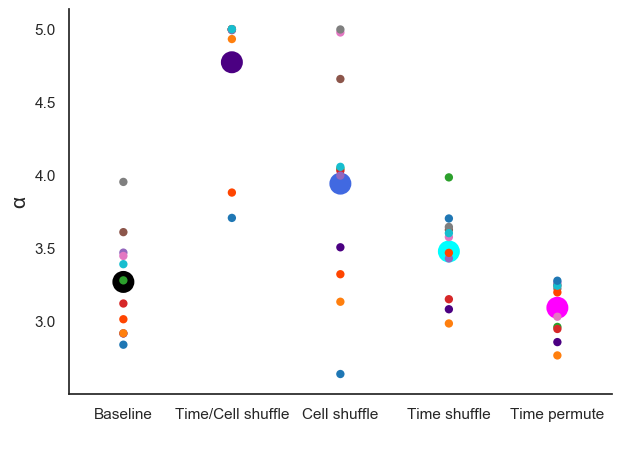

In [43]:
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['black', 'indigo','royalblue','cyan', 'magenta']
fig, ax = plt.subplots(figsize = (7,5))
ax = sns.stripplot(x="Labels", y="Exponent", data=dxdf, hue = 'Fish', palette = colors1, size = 6, jitter = False ,alpha = 1)
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)

ax = sns.pointplot(x="Labels", y="Exponent", data=dxdf, hue = 'Labels', palette = colors2, join=False, ci=0, scale=1.8)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('α', size = '15')
ax.set_xticklabels(['Baseline', 'Time/Cell shuffle', 'Cell shuffle', 'Time shuffle', 'Time permute'], size = 11)
ax.legend_.remove()
plt.show()

In [45]:
mydf = dxdf
p = np.zeros((4,2))
nulist = ['Time + Cell shuffle', 'Cell shuffle','Time shuffle', 'Time permute']
for i in range(len(nulist)):
    p[i] = stats.ttest_rel(mydf['Exponent'].where(mydf['Labels'] == 'Baseline').dropna(),mydf['Exponent'].where(mydf['Labels'] == nulist[i]).dropna())
p

array([[-1.16763293e+01,  3.77644710e-07],
       [-4.74715300e+00,  7.83595904e-04],
       [-2.03025952e+00,  6.97743357e-02],
       [ 1.91043556e+00,  8.51436264e-02]])

In [201]:
#KS + EXP
from scipy import stats
ks_list = adfn.list_of_list(22,4)
nullexp_list, nullratio_list = adfn.list_of_list(22,4),adfn.list_of_list(22,4)
mode = [0,1]
count=0
for y in range(2):
    for i in num1:
        os.chdir(Fdrop + 'Project/' + experiment)
        bln = np.load(sorted(glob.glob('*E-' + i + '*PTZ20*_av.npy*'))[0])
        swaplist = sorted(glob.glob('*E-' + i + '*PTZ20*swap*'))
        shufflelist = sorted(glob.glob('*E-' + i + '*PTZ20*shuff*'))
        autolist = sorted(glob.glob('*E-' + i + '*PTZ20*auto*'))
        slidelist = sorted(glob.glob('*E-' + i + '*PTZ20*slide*'))
        null_list = [shufflelist, swaplist,autolist,slidelist]
        for f in range(len(null_list)):
            mean_null = mean_distribution(null_list[f], mode[y])
            ks_list[count][f] = ks_compare(null_list[f], mean_null, bln, mode[y], len(null_list[f]))
            if mode[y] == 0:
                data = mean_null
                sizes=data
                M=len(sizes)
                a=min(sizes) #define xmin
                b=max(sizes) #define xmax
                npart = 2000 #number of particles - number of draws from prior distribution
                ln=IS_LN(npart)
                po=IS(npart)
                nullexp_list[count][f] = po[0]
                nullratio_list[count][f] = po[1]-ln[2]
            if mode[y] == 1:
                data = mean_null
                sizes=data
                a=2 #define xmin
                b=max(sizes) #define xmax
                M=len(sizes[np.where(sizes>a-1)])
                npart = 2000 #number of particles - number of draws from prior distribution
                ln=IS_LN(npart)
                po=IS(npart)
                nullexp_list[count][f] = po[0]
                nullratio_list[count][f] = po[1]-ln[2]
        count+=1
        print('Done fish ' + str(i))

Done fish 02
Done fish 03
Done fish 04
Done fish 05
Done fish 06
Done fish 07
Done fish 08
Done fish 09
Done fish 10
Done fish 11
Done fish 12
Done fish 02
Done fish 03
Done fish 04
Done fish 05
Done fish 06
Done fish 07
Done fish 08
Done fish 09
Done fish 10
Done fish 11
Done fish 12


In [202]:
#DATA FRAME
import pandas as pd
null_labels = ['Time + Cell shuffle', 'Cell shuffle','Time shuffle', 'Time permute']
ks_bynull = adfn.list_of_list(4,0)
blnexp_list = list(range(11))
ks_stack,p_stack,label_stack, expdiff_stack = [],[],[],[]
size_ks_df = {}
for i in range(len(null_labels)):
    for t in range(11):
        ks_stack = np.append(ks_stack, ks_list[t][i][0])
        p_stack = np.append(p_stack, ks_list[t][i][1])
        label_stack = np.append(label_stack, null_labels[i])
        blnexp_list[t] = np.load(size_powlist[t],allow_pickle=True)[0]
        expdiff_stack = np.append(expdiff_stack, (nullexp_list[t][i] - blnexp_list[t])) 
size_ks_df = pd.DataFrame({"KS distance":ks_stack , "p-value": p_stack, "Exponent change": expdiff_stack, "Labels": label_stack})

ks_stack,p_stack,label_stack, expdiff_stack = [],[],[],[]
for i in range(len(null_labels)):
    for t in range(11):
        ks_stack = np.append(ks_stack, ks_list[t+11][i][0])
        p_stack = np.append(p_stack, ks_list[t+11][i][1])
        label_stack = np.append(label_stack, null_labels[i])
        blnexp_list[t] = np.load(dur_powlist[t],allow_pickle=True)[0]
        expdiff_stack = np.append(expdiff_stack, (nullexp_list[t+11][i] - blnexp_list[t])) 
dur_ks_df = pd.DataFrame({"KS distance":ks_stack , "p-value": p_stack, "Exponent change": expdiff_stack, "Labels": label_stack})

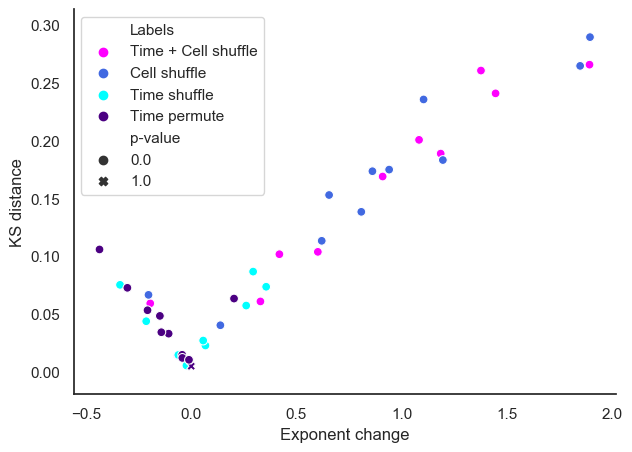

In [203]:
sns.set(style="white")
colors = ['black', 'magenta','royalblue','cyan', 'indigo']
colors2 = ['black', 'black', 'black', 'black']
fig, ax = plt.subplots(figsize = (7,5))
ax = sns.scatterplot(x="Exponent change", y="KS distance",data=size_ks_df, hue='Labels', style = 'p-value', palette = colors[1:], alpha =1, s=40)
#ax = sns.pointplot(x="Labels", y="KS distance",data=ks_df[:44],  palette = colors[1:], ci = "sd")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

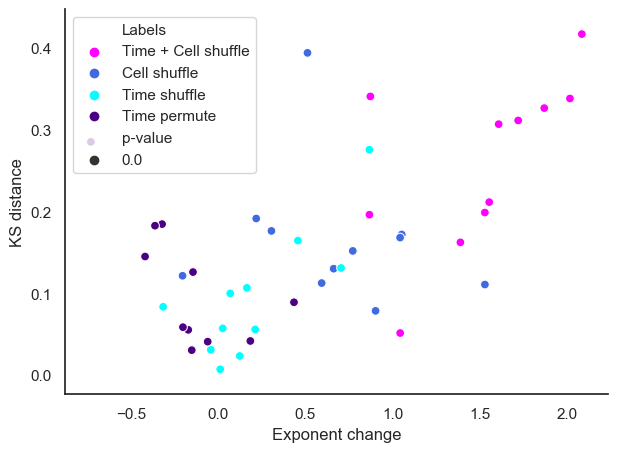

In [204]:
sns.set(style="white")
colors = ['black', 'magenta','royalblue','cyan', 'indigo']
colors2 = ['black', 'black', 'black', 'black']
fig, ax = plt.subplots(figsize = (7,5))
ax = sns.scatterplot(x="Exponent change", y="KS distance",data = dur_ks_df, hue='Labels', style = 'p-value', palette = colors[1:], alpha =1, s=40)
#ax = sns.pointplot(x="Labels", y="KS distance",data=ks_df[:44],  palette = colors[1:], ci = "sd")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#plt.ylim(0, 0.46)
plt.show()